# Agent selection tools

In [1]:
import os

os.environ["KERAS_BACKEND"] = "jax"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from zea import init_device
from zea.agent import selection
from zea.visualize import visualize_matrix
from zea.visualize import set_mpl_style

init_device("cpu")
set_mpl_style()

zea: Using backend 'jax'


## Some random data

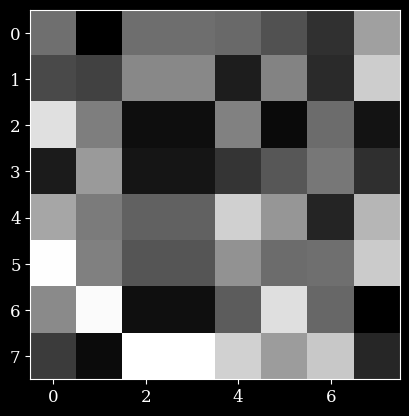

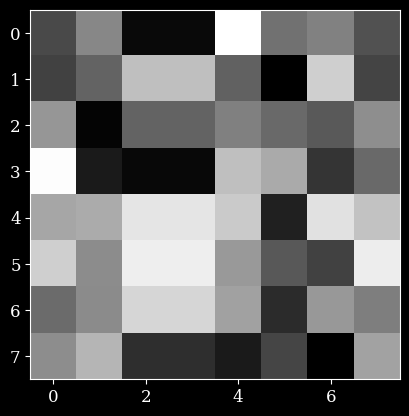

In [3]:
np.random.seed(2)
h, w = 8, 8
rand_img_1 = np.random.rand(h, w, 1).astype(np.float32)
rand_img_2 = np.random.rand(h, w, 1).astype(np.float32)

# manually make lines 2 and 3 very correlated
rand_img_1[:, 2] = rand_img_1[:, 3]
rand_img_2[:, 2] = rand_img_2[:, 3]

particles = np.stack([rand_img_1, rand_img_2], axis=0)[:, None]
particles = np.squeeze(particles, axis=-1) # shape (n_particles, 1, h, w)
plt.imshow(rand_img_1, cmap='gray')
plt.show()
plt.imshow(rand_img_2, cmap='gray')

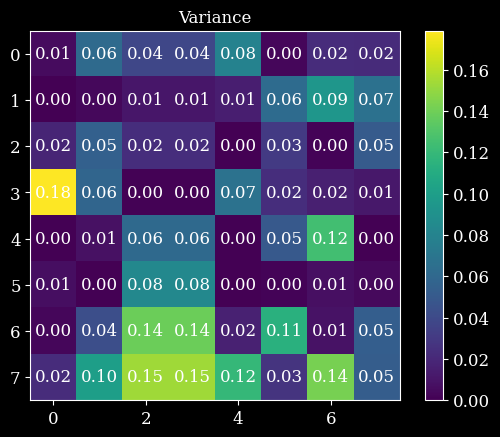

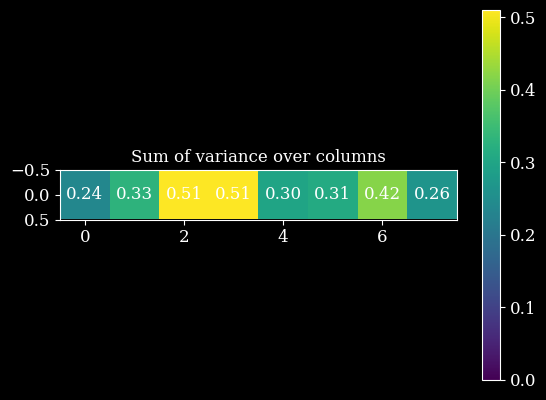

In [4]:
var_img = np.var(particles, axis=0)
var_img = np.squeeze(var_img, axis=0)
sum_var = np.sum(var_img, axis=0)

fig = visualize_matrix(var_img, vmin=0)
plt.title('Variance')
plt.show()

fig = visualize_matrix(sum_var[None], vmin=0)
plt.title('Sum of variance over columns')
plt.show()

CUDA backend failed to initialize: jaxlib/cuda/versions_helpers.cc:98: operation cuInit(0) failed: CUDA_ERROR_NO_DEVICE (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


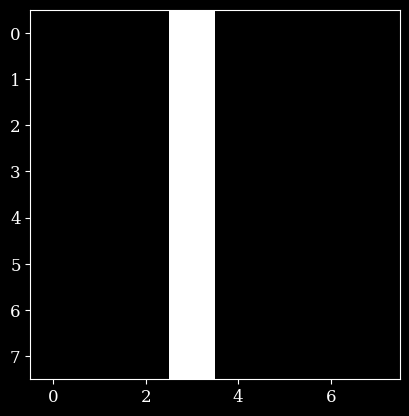

In [5]:
n_actions = 1
agent = selection.CovarianceSamplingLines(n_actions, w, h, w, n_masks=200)

lines, mask = agent.sample(particles)
mask = np.squeeze(mask, axis=0)
plt.imshow(mask, cmap='gray')

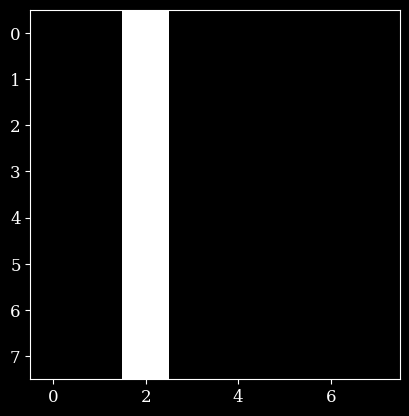

In [6]:
n_actions = 1
agent = selection.GreedyEntropy(n_actions, w, h, w)

lines, mask = agent.sample(particles)
mask = np.squeeze(mask, axis=0)
plt.imshow(mask, cmap='gray')

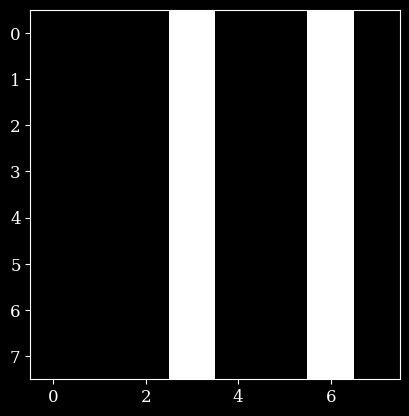

In [7]:
n_actions = 2
agent = selection.CovarianceSamplingLines(n_actions, w, h, w, n_masks=200)

lines, mask = agent.sample(particles)
mask = np.squeeze(mask, axis=0)
plt.imshow(mask, cmap='gray')

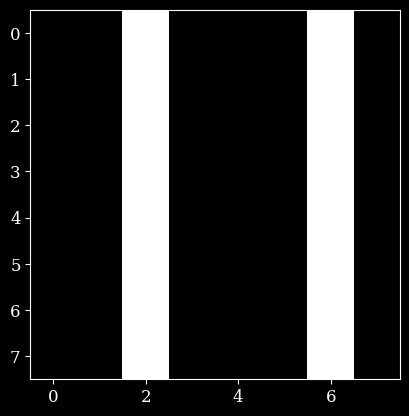

In [8]:
n_actions = 2
agent = selection.GreedyEntropy(n_actions, w, h, w)

lines, mask = agent.sample(particles)
mask = np.squeeze(mask, axis=0)
plt.imshow(mask, cmap='gray')